In [164]:
import numpy as np
import pandas as pd
import seaborn as sns

### Reading CSV

In [165]:
data = pd.read_csv('car price.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


### Checking for null data and basic info

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company Name         46022 non-null  object
 1   Model Name           46022 non-null  object
 2   Price                46022 non-null  int64 
 3   Model Year           46022 non-null  int64 
 4   Location             46022 non-null  object
 5   Mileage              46022 non-null  int64 
 6   Engine Type          46022 non-null  object
 7   Engine Capacity      46022 non-null  int64 
 8   Color                46022 non-null  object
 9   Assembly             46022 non-null  object
 10  Body Type            46022 non-null  object
 11  Transmission Type    46022 non-null  object
 12  Registration Status  46022 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.6+ MB


In [167]:
data.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [168]:
data.dtypes

Company Name           object
Model Name             object
Price                   int64
Model Year              int64
Location               object
Mileage                 int64
Engine Type            object
Engine Capacity         int64
Color                  object
Assembly               object
Body Type              object
Transmission Type      object
Registration Status    object
dtype: object

In [169]:
data.nunique()

Company Name             31
Model Name              196
Price                  1419
Model Year               30
Location                  6
Mileage                5573
Engine Type               3
Engine Capacity          75
Color                    24
Assembly                  2
Body Type                 6
Transmission Type         2
Registration Status       2
dtype: int64

In [170]:
x = data
y = data['Price']
categorical = pd.DataFrame()

### Using label encoder to encode all categorical dtypes

In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
label = LabelEncoder()
for i in x.columns:
    if(x[i].dtype == 'object'):
        x[i] = label.fit_transform(x[i])
        categorical[i] = x[i]
categorical

,Company Name,Model Name,Location,Engine Type,Color,Assembly,Body Type,Transmission Type,Registration Status
0,28,181,1,2,18,0,1,0,1
1,28,53,2,2,21,1,4,0,0
2,27,14,2,2,21,1,1,0,1
3,27,14,4,2,21,1,1,1,0
4,28,53,1,2,2,1,4,1,0
...,...,...,...,...,...,...,...,...,...
46017,10,179,4,2,2,0,0,0,1
46018,28,15,4,2,3,0,1,0,1
46019,10,49,4,2,2,1,4,0,0
46020,28,15,4,2,2,0,1,0,0


In [173]:
x.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,28,181,2385000,2017,1,9869,2,1000,18,0,1,0,1
1,28,53,111000,2019,2,11111,2,1300,21,1,4,0,0
2,27,14,1530000,2019,2,17500,2,660,21,1,1,0,1
3,27,14,1650000,2019,4,9600,2,660,21,1,1,1,0
4,28,53,1435000,2010,1,120000,2,1300,2,1,4,1,0


### Checking correlation heatmap 

<Axes: >

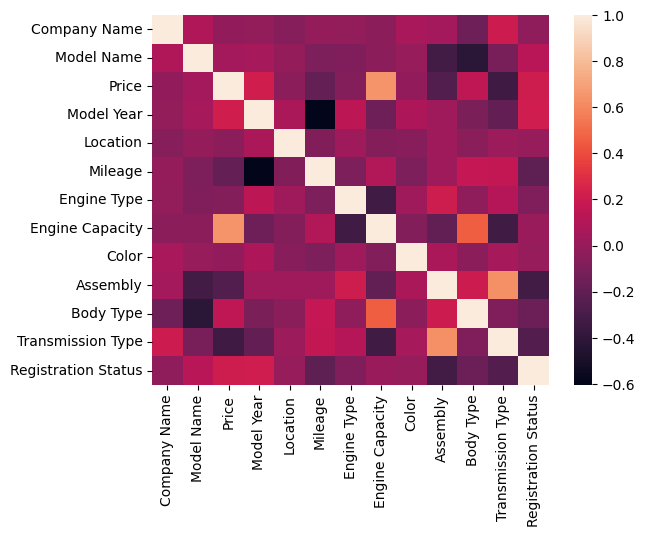

In [174]:
sns.heatmap(x.corr())

In [175]:
# from scipy import stats

# for i in categorical.columns:
#     stats.pointbiserialr(categorical[i], y)
#     print(i +' '+ str(stats.pointbiserialr(categorical[i], y)[0]))

### Dropping all columns that have low correlation

In [176]:
x.drop(columns=['Company Name','Model Name','Location','Engine Type','Color'],inplace=True)
x.head()

,Price,Model Year,Mileage,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,2385000,2017,9869,1000,0,1,0,1
1,111000,2019,11111,1300,1,4,0,0
2,1530000,2019,17500,660,1,1,0,1
3,1650000,2019,9600,660,1,1,1,0
4,1435000,2010,120000,1300,1,4,1,0


### Checking heatmap again

<Axes: >

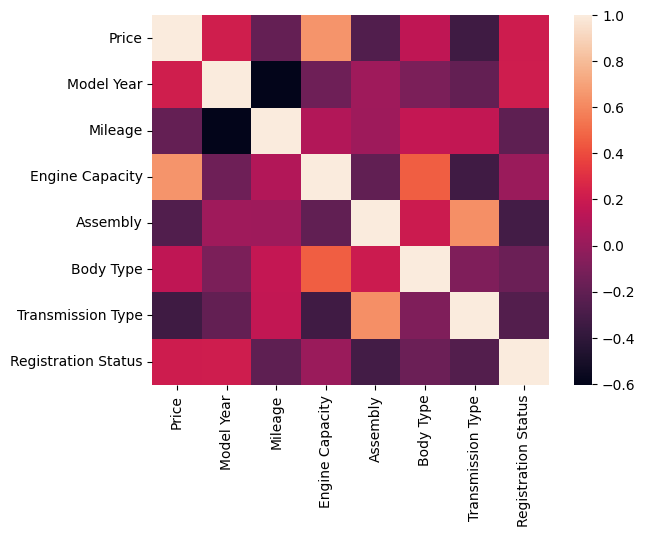

In [177]:
sns.heatmap(x.corr())

In [178]:
x.drop(columns=['Price'],inplace = True)

In [179]:
x.head()

,Model Year,Mileage,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,2017,9869,1000,0,1,0,1
1,2019,11111,1300,1,4,0,0
2,2019,17500,660,1,1,0,1
3,2019,9600,660,1,1,1,0
4,2010,120000,1300,1,4,1,0


### Using StandardScaler to scale continuous values

In [180]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
linearVar = [['Mileage','Engine Capacity']]
x[['Mileage','Engine Capacity']] = scale.fit_transform(x[['Mileage','Engine Capacity']])

In [181]:
x

,Model Year,Mileage,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,2017,-1.273975,-0.509393,0,1,0,1
1,2019,-1.254464,-0.021337,1,4,0,0
2,2019,-1.154097,-1.062522,1,1,0,1
3,2019,-1.278201,-1.062522,1,1,1,0
4,2010,0.456122,-0.021337,1,4,1,0
...,...,...,...,...,...,...,...
46017,2015,-0.926310,0.304033,0,0,0,1
46018,2015,-0.612121,0.304033,0,1,0,1
46019,2015,0.534669,0.792089,1,4,0,0
46020,2016,-0.486445,0.304033,0,1,0,0


### Increasing features of data using PolynomialFeatures with degree 3

In [182]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
x = poly.fit_transform(x)

In [183]:
x

array([[ 1.00000000e+00,  2.01700000e+03, -1.27397533e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  2.01900000e+03, -1.25446420e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01900000e+03, -1.15409654e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  2.01500000e+03,  5.34669014e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01600000e+03, -4.86445041e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01500000e+03, -2.19384442e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### Splitting data

In [184]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=100)

### Fitting LinearRegression model on training data

In [185]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
result = model.fit(xtrain,ytrain)

### Predicting data

In [186]:
ypred = model.predict(xtest[0:10])

In [187]:
xtest[0:10]

array([[ 1.00000000e+00,  2.00800000e+03,  5.34669014e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.00700000e+03,  7.90950510e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.99800000e+03,  1.39868860e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.99600000e+03,  2.49834989e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.99600000e+03,  1.41932839e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01900000e+03, -1.24049850e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [188]:
ytest[0:10]

32043    1375000
15939     770000
40205     980000
27614    1930000
28533    1950000
41434    3400000
37238    1200000
34030     525000
6354      325000
2935     3375000
Name: Price, dtype: int64

In [189]:
ypred

array([1514857.27435303, 1169998.60418701,  622806.97128296,
       1595821.12747192, 1560405.7194519 , 4775232.37457275,
        897221.38156128,  613749.29046631,  655610.32754517,
       3658409.29412842])

In [190]:
model.coef_

array([ 1.25616592e+05, -1.62363950e+08, -4.20817862e+09,  3.25802309e+10,
       -4.42778525e+09, -6.39192769e+09,  4.98247547e+09,  6.73245236e+09,
        7.25973992e+04,  4.25028235e+06, -3.25681769e+07,  6.67539220e+06,
        6.26189051e+06, -7.43135368e+06, -1.00410052e+07, -3.70138955e+06,
        2.06471490e+07, -4.19044880e+07,  1.43485280e+05, -1.06903829e+07,
        2.15259163e+07, -4.77974868e+07,  1.12209183e+08, -9.04942108e+06,
       -1.86021086e+07, -1.24013030e+08, -4.44153845e+09, -6.27932605e+06,
        8.09316939e+06, -2.14300482e+07,  3.98778419e+07,  3.96518010e+05,
        5.50827891e+07,  4.99238647e+09,  6.14629067e+06,  6.73092976e+09,
       -1.06772503e+01, -1.07292966e+03,  8.13891899e+03, -3.34036955e+03,
       -1.53382677e+03,  3.71891435e+03,  4.99074466e+03,  1.87965846e+03,
       -1.03211675e+04,  4.18518616e+04, -2.89657000e+02,  1.06970000e+04,
       -2.11168320e+04,  2.39869402e+04, -1.11925528e+05,  4.92113484e+03,
        1.86018536e+04,  

### Plotting real vs predicted data

c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='Price', ylabel='Density'>

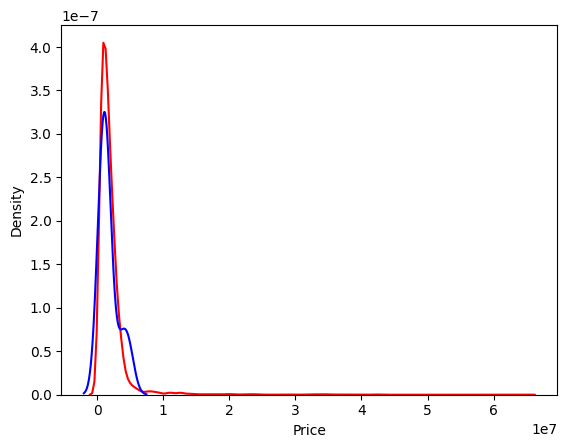

In [191]:
ax1 = sns.kdeplot(ytest, color = 'r', label = 'Actual Value')
sns.kdeplot(ypred, color = 'b', label = 'Fitted Value', ax = ax1)

### Metrics of the model

In [192]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
resid = ytest - ypred
std_dev = np.std(resid)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
mae = mean_absolute_error(ytest,ypred)
r2 = r2_score(ytest,ypred)

ValueError: operands could not be broadcast together with shapes (18409,) (10,) 

In [ ]:
print('Standard Deviation: ' + str(std_dev))
print('Root mean squared error: ' + str(rmse))
print('Mean absolute error: ' + str(mae))
print('R2 score: ' + str(r2))

Standard Deviation: 918008.7811945141
Root mean squared error: 918031.6262884506
Mean absolute error: 376554.719347649
R2 score: 0.9018832506138211
